[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/SlimeVRX/SlimeVRX/blob/main/hipnuc/document/10.ipynb)

#**Study [Attitude for IMU & AHRS](https://zhuanlan.zhihu.com/p/351596374)**
#**Lesson 10: Bortz Equation, Differential Equation of Equivalent RV**
# [(Bortz方程，等效旋转矢量的微分方程)](https://zhuanlan.zhihu.com/p/101305384)

> Cập nhật Attitude đã được hoàn thành trong phần trước, tại sao bài viết này vẫn tiếp tục? Lý do cốt lõi là phần trước, chúng tôi giả định rằng chuyển động quay của trục cố định nằm trong khoảng tích phân, bản thân nó là một khoảng gần đúng, và sẽ là lỗi. Trong phần này, chúng tôi nghiên cứu kỹ lưỡng mối quan hệ giữa vận tốc góc và véc tơ quay tương đương RV (phương trình Bortz) và đưa ra công thức cập nhật Attitude chính xác hơn (phức tạp) (về cơ bản không cần thiết cho các thiết bị giá rẻ).

### Phương trình Bortz

Dựa trên sự cập nhật của ma trận Attitude và Quaternion, RV (véc tơ quay tương đương) được yêu cầu phải được tính toán đầu tiên, và việc tính toán RV phụ thuộc vào phương trình vi phân của chính nó. Kết quả được đưa ra trực tiếp tại đây:

<p align="left"><img width="400", src="https://pic2.zhimg.com/80/v2-4cf8c43ed04065adc7ec2f9d5d868249_720w.png"></p>

Phương trình Bortz

Hãy nhìn xem, dưới sự quay của trục không cố định, RV không đơn giản bằng vận tốc góc * dt. Có một mối quan hệ phức tạp giữa đạo hàm của RV và vận tốc góc! Công thức này còn được gọi là phương trình Bortz. Thông qua khai triển Taylor của hàm lượng giác và loại bỏ các số hạng bậc cao, nó có thể được đơn giản hóa và cuối cùng thu được:

<p align="left"><img width="300", src="https://pic4.zhimg.com/80/v2-2da989cc1cae9ccb17ab3bb8c89ea55b_720w.png"></p>

Một ước tính khác của Bortz



### Các giải pháp của chuỗi Taylor về phương trình vi phân véc tơ quay tương đương

Mục đích của chúng tôi là sử dụng gia số góc (giá trị được thu thập bởi cảm biến con quay hồi chuyển * dt) để đại diện cho vectơ quay tương đương: chúng tôi có thể nhận được thuật toán hai mẫu nổi tiếng: (bỏ qua quy trình dẫn xuất cụ thể)

<p align="left"><img width="300", src="https://pic3.zhimg.com/80/v2-0fd51416ca1682bd84c14911973def7a_720w.jpg"></p>

Thuật toán hai mẫu, con quay hồi chuyển sợi quang sử dụng.

<p align="left"><img width="500", src="https://pic1.zhimg.com/80/v2-bf091b2c66d52c45e170249ebc2499dc_720w.png"></p>

Thuật toán ba mẫu hoàn toàn không cần thiết.

Nếu vectơ quay tương đương được coi trực tiếp như một gia số góc, nó là một mẫu đơn (giống như phần trước)

<p align="left"><img width="300", src="https://pic2.zhimg.com/80/v2-dd1231cc86ec82281c1c415fe590e0d1_720w.png"></p>

Mẫu đơn, MEMS có thể sử dụng một mẫu duy nhất.

### Một ví dụ về dữ liệu thực

Đã nói rất nhiều công thức để cập nhật Attitude, hãy lấy một ví dụ thực tế:

Sử dụng mô-đun Attitude chi phí thấp của chúng tôi: sử dụng máy tính chủ phù hợp để thu thập dữ liệu 2 giây ở tốc độ mặc định 100Hz, bao gồm gia tốc, vận tốc góc và góc Euler (được tính toán bởi chính mô-đun Attitude), sau đó sử dụng Python để tính toán mô-đun thái độ So sánh với phần cứng.

Toàn bộ quá trình diễn ra rất ngắn, khoảng 8 giây. Thuật toán đơn nguyên được sử dụng. Lưu ý rằng tôi đã cố tình thực hiện bài tập này để thường xuyên hơn, có thể như sau:

1. Xoay quanh trục X: Góc Pitch (góc cao độ theta) di chuyển theo hướng dương, và sau đó quay trở lại.
2. Xoay quanh trục Y: Góc Roll (góc cuộn phi) di chuyển theo hướng âm, sau đó quay trở lại.
3. Xoay quanh trục Z: Góc Yall (góc phương vị psi) di chuyển về phía trước, sau đó quay trở lại.

Cuối cùng thì tư thế chúng ta giải quyết cũng phải tuân theo quy tắc này (như một sự xác minh). Đây cũng là một cách cơ bản để thực hiện kỹ thuật: trước tiên hãy thử nghiệm với các **giả định cố định** đã biết, sau đó xác minh quy trình tính toán của bạn. Ngược lại, nếu bạn thực hiện một số động tác tạo dáng **ngẫu nhiên**, giải pháp cuối cùng sẽ không biết là đúng hay sai.

In [16]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

cos = np.cos
sin = np.sin
asin = np.arcsin
atan2 = np.arctan2

In [17]:
# !git clone https://github.com/SlimeVRX/SlimeVRX.git
# annots = sio.loadmat('/content/SlimeVRX/hipnuc/code/gyroReading.mat')

In [18]:
def ch_rv2q(rv):
    nm2 = rv.dot(rv)
    if nm2 < 1.e-8:
        q0 = 1-nm2*(1/8-nm2/384)
        s = 1/2-nm2*(1/48-nm2/3840)
    else:
        nm = np.sqrt(nm2)
        q0 = cos(nm/2)
        s = sin(nm/2)/nm
    q = np.concatenate([[q0],s*rv])
    return q

def ch_qmul(q1, q2):
    q = np.array([ q1[0] * q2[0] - q1[1] * q2[1] - q1[2] * q2[2] - q1[3] * q2[3],
                   q1[0] * q2[1] + q1[1] * q2[0] + q1[2] * q2[3] - q1[3] * q2[2],
                   q1[0] * q2[2] + q1[2] * q2[0] + q1[3] * q2[1] - q1[1] * q2[3],
                   q1[0] * q2[3] + q1[3] * q2[0] + q1[1] * q2[2] - q1[2] * q2[1] ], dtype=np.float64)
    return q

from numpy.linalg import norm
def ch_qnormlz(q):
    q = q / norm(q,2)
    if q[0] < 0:
        q[0] = -q[0]
        q[1] = -q[1]
        q[2] = -q[2]
        q[3] = -q[3]
    return q

def ch_q2eul_312(Qb2n):
    q0 = Qb2n[0]
    q1 = Qb2n[1]
    q2 = Qb2n[2]
    q3 = Qb2n[3]

    roll =  -atan2( 2*( q1*q3 - q0*q2 ) , q0*q0 - q1*q1 - q2*q2 + q3*q3)
    pitch = asin( 2*(q0*q1 + q2*q3) )
    yaw = -atan2(2*( q1*q2 - q0*q3 ), q0*q0 - q1*q1 + q2*q2 - q3*q3)
    return pitch, roll, yaw

Final Euler Angles: pich:0.1872° roll:-0.1324° yaw:-0.8487°



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


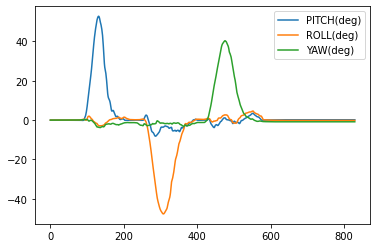

In [19]:
gyroReading = np.array([item for item in annots['gyroReading']], dtype=np.float64)

dt = 0.01
N = len(gyroReading)

eul = np.zeros((N, 3), dtype=np.float64)

Qb2n = np.array([1, 0, 0, 0])

for i in range(N):
    theta = np.deg2rad(gyroReading[i]) * dt

    Q_m2m_1 = ch_rv2q(theta)

    Qb2n = ch_qmul(Qb2n, Q_m2m_1)

    Qb2n = ch_qnormlz(Qb2n)
    
    eul[i,:] = np.rad2deg(ch_q2eul_312(Qb2n))

tmp = eul[-1]
#Final Euler Angles:  Góc Euler cuối cùng:
print("Final Euler Angles: pich:%.4f° roll:%.4f° yaw:%.4f°\n" %(tmp[0], tmp[1], tmp[2]))

fig = plt.figure()
plt.plot(eul)
ax = plt.subplot()
ax.legend(["PITCH(deg)", "ROLL(deg)", "YAW(deg)"])

Có thể thấy rằng sự thay đổi của góc Euler là phù hợp với chuyển động thực. Và cuối cùng về cơ bản là trở về vị trí ban đầu (có lỗi đặt tay).


Tóm tắt
- Trong MEMS chi phí, một mẫu duy nhất được sử dụng (như trong phần trước, nó hoàn toàn đủ). Tất nhiên, nếu IMU MEMS của bạn đã có trên W, bạn có thể cân nhắc hai hoặc nhiều cái nâng cao.
- Sơ đồ các bước tích hợp thái độ:

<p align="left"><img width="600", src="https://pic1.zhimg.com/80/v2-801c2ff8734a5115890a8c6f06189c20_720w.jpg"></p>

Quaternion được sử dụng trong hầu hết các trường hợp

- MEMS chi phí thấp (< 1W RMB) đầu ra thực sự là một gia số góc, không phải vận tốc góc.
- Nếu bạn có một con quay hồi chuyển lý tưởng (tất nhiên là không thể), thì về mặt lý thuyết, bạn đã học được phép tính Attitude ở thời điểm này. Tuy nhiên, luôn có sai số trong thế giới thực và thuật toán không chính xác 100%. Giờ tôi nghĩ lại, việc tính toán thái độ con quay hồi chuyển về cơ bản là một quá trình tích hợp và việc tích hợp chắc chắn sẽ mang lại sai số tích lũy. Theo thời gian, lỗi chắc chắn sẽ tăng lên. Điều này đòi hỏi phải có cảm biến khác để "sửa sai". "Kéo" lại lỗi Attitude.
- Một lần nữa, tích hợp MEMS chi phí thấp đơn giản là không cần thiết để sử dụng hai hoặc thậm chí nhiều mẫu con.
- Dữ liệu của ví dụ thử nghiệm Attitude thực có thể được lấy từ: yandld/nav_matlab và bạn có thể mua mô-đun từ www.hipnuc.com